# Predicting the stability of a 4 node electrical grid

Electricity is an essential part of everyday life. It is responsible for the operation of many products that are used ranging from computers and the internet to our toaster and coffee maker. The future of the electricity lies in the concept of 'smart grids'. These grids will be able to use data to determine how electricity is supplied in a given region. In order to keep a grid stable, the electricity demand and supply needs to be equal to each other. In this notebook, a dataset will be analyzed and model made to predict where the network is unstable. 

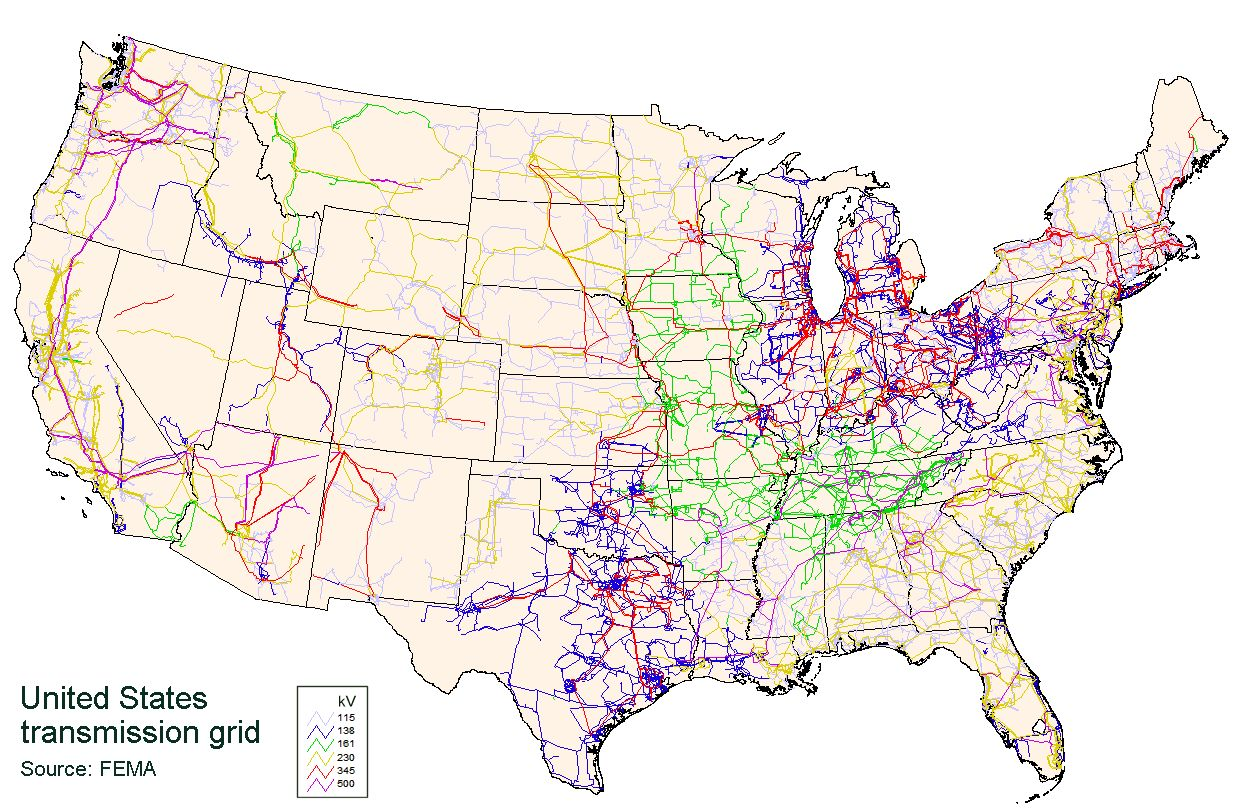




Some Information to note about the dataset:

This is a multivariate dataset and classification and regression will be used to identify whether the electrical network is stable or unstable. 

The dataset was taken from the UCI Machine Learning Repository

Creator and donor: Vadim Arzamasov (vadim.arzamasov '@' kit.edu)

This dataset was a result of a research paper that tried to implement a 4 star node system for decentralized electricity distribution. I would guess It looks something like this. 

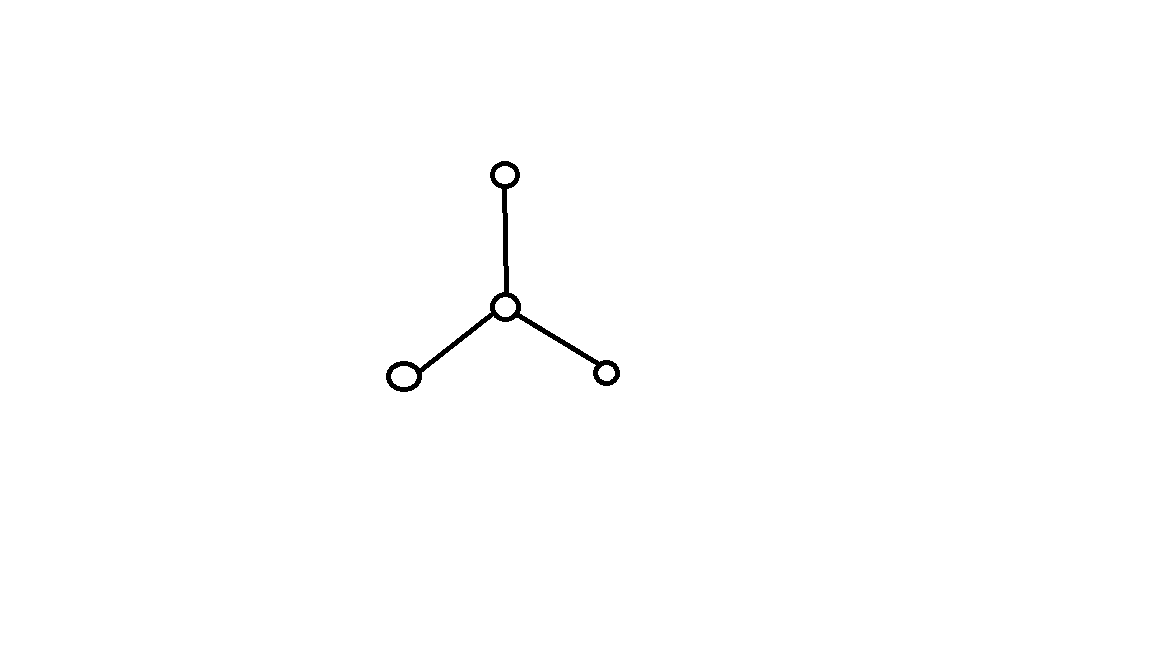

The middle node is the power station and the other three nodes are the buildings that are being supplied with power. A multitude of measurements were made along with the final classification of whether the power supply was stable or not. Using this data, a model will be created to predict when the power needs to be diverted or supplied to the buildings. 

# Import Data and Initial Investigation of variables

First we need to bring in the dataset and analyze the variables. 

In [4]:

import types
import pandas as pd
from ibm_botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_1c6c805970464b2e97f5ab0ffb03d06e = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='tWKb2fBpUHT9YdStB8YkJQTiA09Rx7Y1vVf-KXNsWe6b',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_1c6c805970464b2e97f5ab0ffb03d06e.get_object(Bucket='advanceddatasciencecapstone-donotdelete-pr-pd974xgadxrvvg',Key='Data_for_UCI_namedModified.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_6 = pd.read_csv(body)
df_data_6.head()



,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,0.0
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,1.0
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,0.0
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,0.0
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,0.0


Data is currently all in string format. To change that, cast all data columns as floats

In [16]:


df = df_data_6.astype(float)

df.dtypes

tau1     float64
tau2     float64
tau3     float64
tau4     float64
p1       float64
p2       float64
p3       float64
p4       float64
g1       float64
g2       float64
g3       float64
g4       float64
stab     float64
stabf    float64
dtype: object

Attribute Information:

11 predictive attributes, 1 non-predictive(p1), 2 goal fields: 
1. tau[x]: reaction time of participant (real from the range [0.5,10]s). Tau1 - the value for electricity producer. 
2. p[x]: nominal power consumed(negative)/produced(positive)(real). For consumers from the range [-0.5,-2]s^-2; p1 = abs(p2 + p3 + p4) 
3. g[x]: coefficient (gamma) proportional to price elasticity (real from the range [0.05,1]s^-1). g1 - the value for electricity producer. 
4. stab: the maximal real part of the characteristic equation root (if positive - the system is linearly unstable)(real) 
5. stabf: the stability label of the system (categorical: 1-stable/0-unstable) 

Source: http://archive.ics.uci.edu/ml/datasets/Electrical+Grid+Stability+Simulated+Data+#

## Exploratory Data Analysis

Lets look at the data a little. We will be using box plots and histograms to see how the data is distributed. 

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731,0.362000
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919,0.480603
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760,0.000000
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557,0.000000
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142,0.000000
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878,1.000000
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403,1.000000


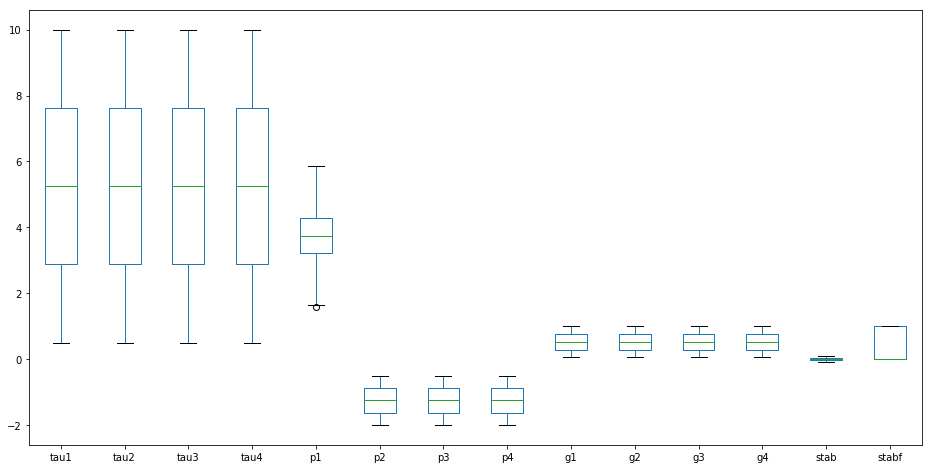

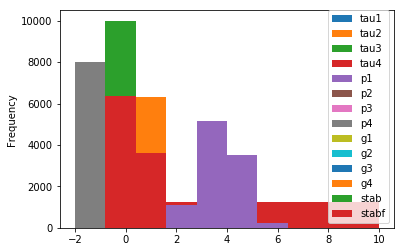

In [35]:
#create a box plot of the variables
df.plot(kind = 'box', figsize = [16,8])

#create histogram
df.plot(kind = 'hist')


#get basic statistics

df.describe()

In [36]:
DF = sqlContext.createDataFrame(df)

type(DF)

pyspark.sql.dataframe.DataFrame

# Machine Learning Pipeline

Now its time to create the machine learning pipeline to learn from the data. This step will be simple as the class column has been made beforehand. 

In [37]:
from pyspark.ml.feature import VectorAssembler

vectorAssembler = VectorAssembler(inputCols = ["tau1", "tau2", "tau3", "tau4","p1","p2","p3","p4","g1","g2","g3","g4"] , outputCol = "features")

In [38]:
from pyspark.ml.classification import GBTClassifier

classifier = GBTClassifier(labelCol = 'stabf', featuresCol='features', maxIter=50)

In [39]:
from pyspark.ml import Pipeline

pipeline = Pipeline(stages=[vectorAssembler, classifier])

In [40]:
model = pipeline.fit(DF)

In [41]:
prediction = model.transform(DF)

In [42]:
prediction.show()

+------------------+------------------+------------------+------------------+------------------+-------------------+-------------------+-------------------+-------------------+------------------+-------------------+-------------------+--------------------+-----+--------------------+----------+
|              tau1|              tau2|              tau3|              tau4|                p1|                 p2|                 p3|                 p4|                 g1|                g2|                 g3|                 g4|                stab|stabf|            features|prediction|
+------------------+------------------+------------------+------------------+------------------+-------------------+-------------------+-------------------+-------------------+------------------+-------------------+-------------------+--------------------+-----+--------------------+----------+
|       2.959060025|3.0798852039999995|       8.381025392|       9.780754432|       3.763084772|       -0.782603631

In [43]:
prediction.toPandas()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf,features,prediction
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,0.0,"[2.959060025, 3.079885204, 8.381025392, 9.7807...",0.0
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,1.0,"[9.304097235, 4.902524112, 3.047540728, 1.3693...",0.0
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,0.0,"[8.971706909, 8.848428421, 3.046478749, 1.2145...",0.0
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,0.0,"[0.716414776, 7.669599644, 4.486640831, 2.3405...",0.0
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,0.0,"[3.134111552, 7.608771616, 4.943759302, 9.8575...",0.0
5,6.999209,9.109247,3.784066,4.267788,4.429669,-1.857139,-0.670397,-1.902133,0.261793,0.077930,0.542884,0.469931,-0.017385,1.0,"[6.999208709, 9.109246716, 3.784065909, 4.2677...",0.0
6,6.710166,3.765204,6.929314,8.818562,2.397419,-0.614590,-1.208826,-0.574004,0.177890,0.397977,0.402046,0.376630,0.005954,0.0,"[6.710166368, 3.765204184, 6.929314439, 8.8185...",0.0
7,6.953512,1.379125,5.719400,7.870307,3.224495,-0.748998,-1.186517,-1.288980,0.371385,0.633204,0.732741,0.380544,0.016634,0.0,"[6.953511558, 1.379125002, 5.71940003, 7.87030...",0.0
8,4.689852,4.007747,1.478573,3.733787,4.041300,-1.410344,-1.238204,-1.392751,0.269708,0.250364,0.164941,0.482439,-0.038677,1.0,"[4.689851927, 4.007747462, 1.478572876, 3.7337...",1.0
9,9.841496,1.413822,9.769856,7.641616,4.727595,-1.991363,-0.857637,-1.878594,0.376356,0.544415,0.792039,0.116263,0.012383,0.0,"[9.841496488, 1.413821592, 9.769855549, 7.6416...",0.0


In [44]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
binEval = MulticlassClassificationEvaluator().setMetricName("accuracy") .setPredictionCol("prediction").setLabelCol("stabf")
    
binEval.evaluate(prediction)

0.954

The model has obtained a 95.4% accuracy on the dataset. This is more than satisfactory. The GBT ensemble method has done quite a good job. There was no need to use neural networks for this task. 

# Relevant Paper

Arzamasov, Vadim, Klemens BÃ¶hm, and Patrick Jochem. 'Towards Concise Models of Grid Stability.' Communications, Control, and Computing Technologies for Smart Grids (SmartGridComm), 2018 IEEE International Conference on. IEEE, 2018 
(Section V-A) 